In [1]:
%load_ext lab_black

In [2]:
%run -i ./preamble.py

In [3]:
from simulate import *
from inverse_moments import *

In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.rcParams["figure.figsize"] = (3.0, 3.0)
plt.rcParams["figure.dpi"] = 500
plt.rcParams["font.size"] = 12

In [6]:
selfCol = "tab:green"
extCol = "tab:purple"

In [7]:
dt = 1e-10

In [8]:
from matplotlib.patches import FancyArrowPatch

['$\\lambda_t$', '$\\overline{\\lambda}_{t \\mid 2}$', '$\\overline{\\lambda}_{t \\mid 1.25}$', '$\\overline{\\lambda}_{t \\mid 0}$', 'Self', 'External']


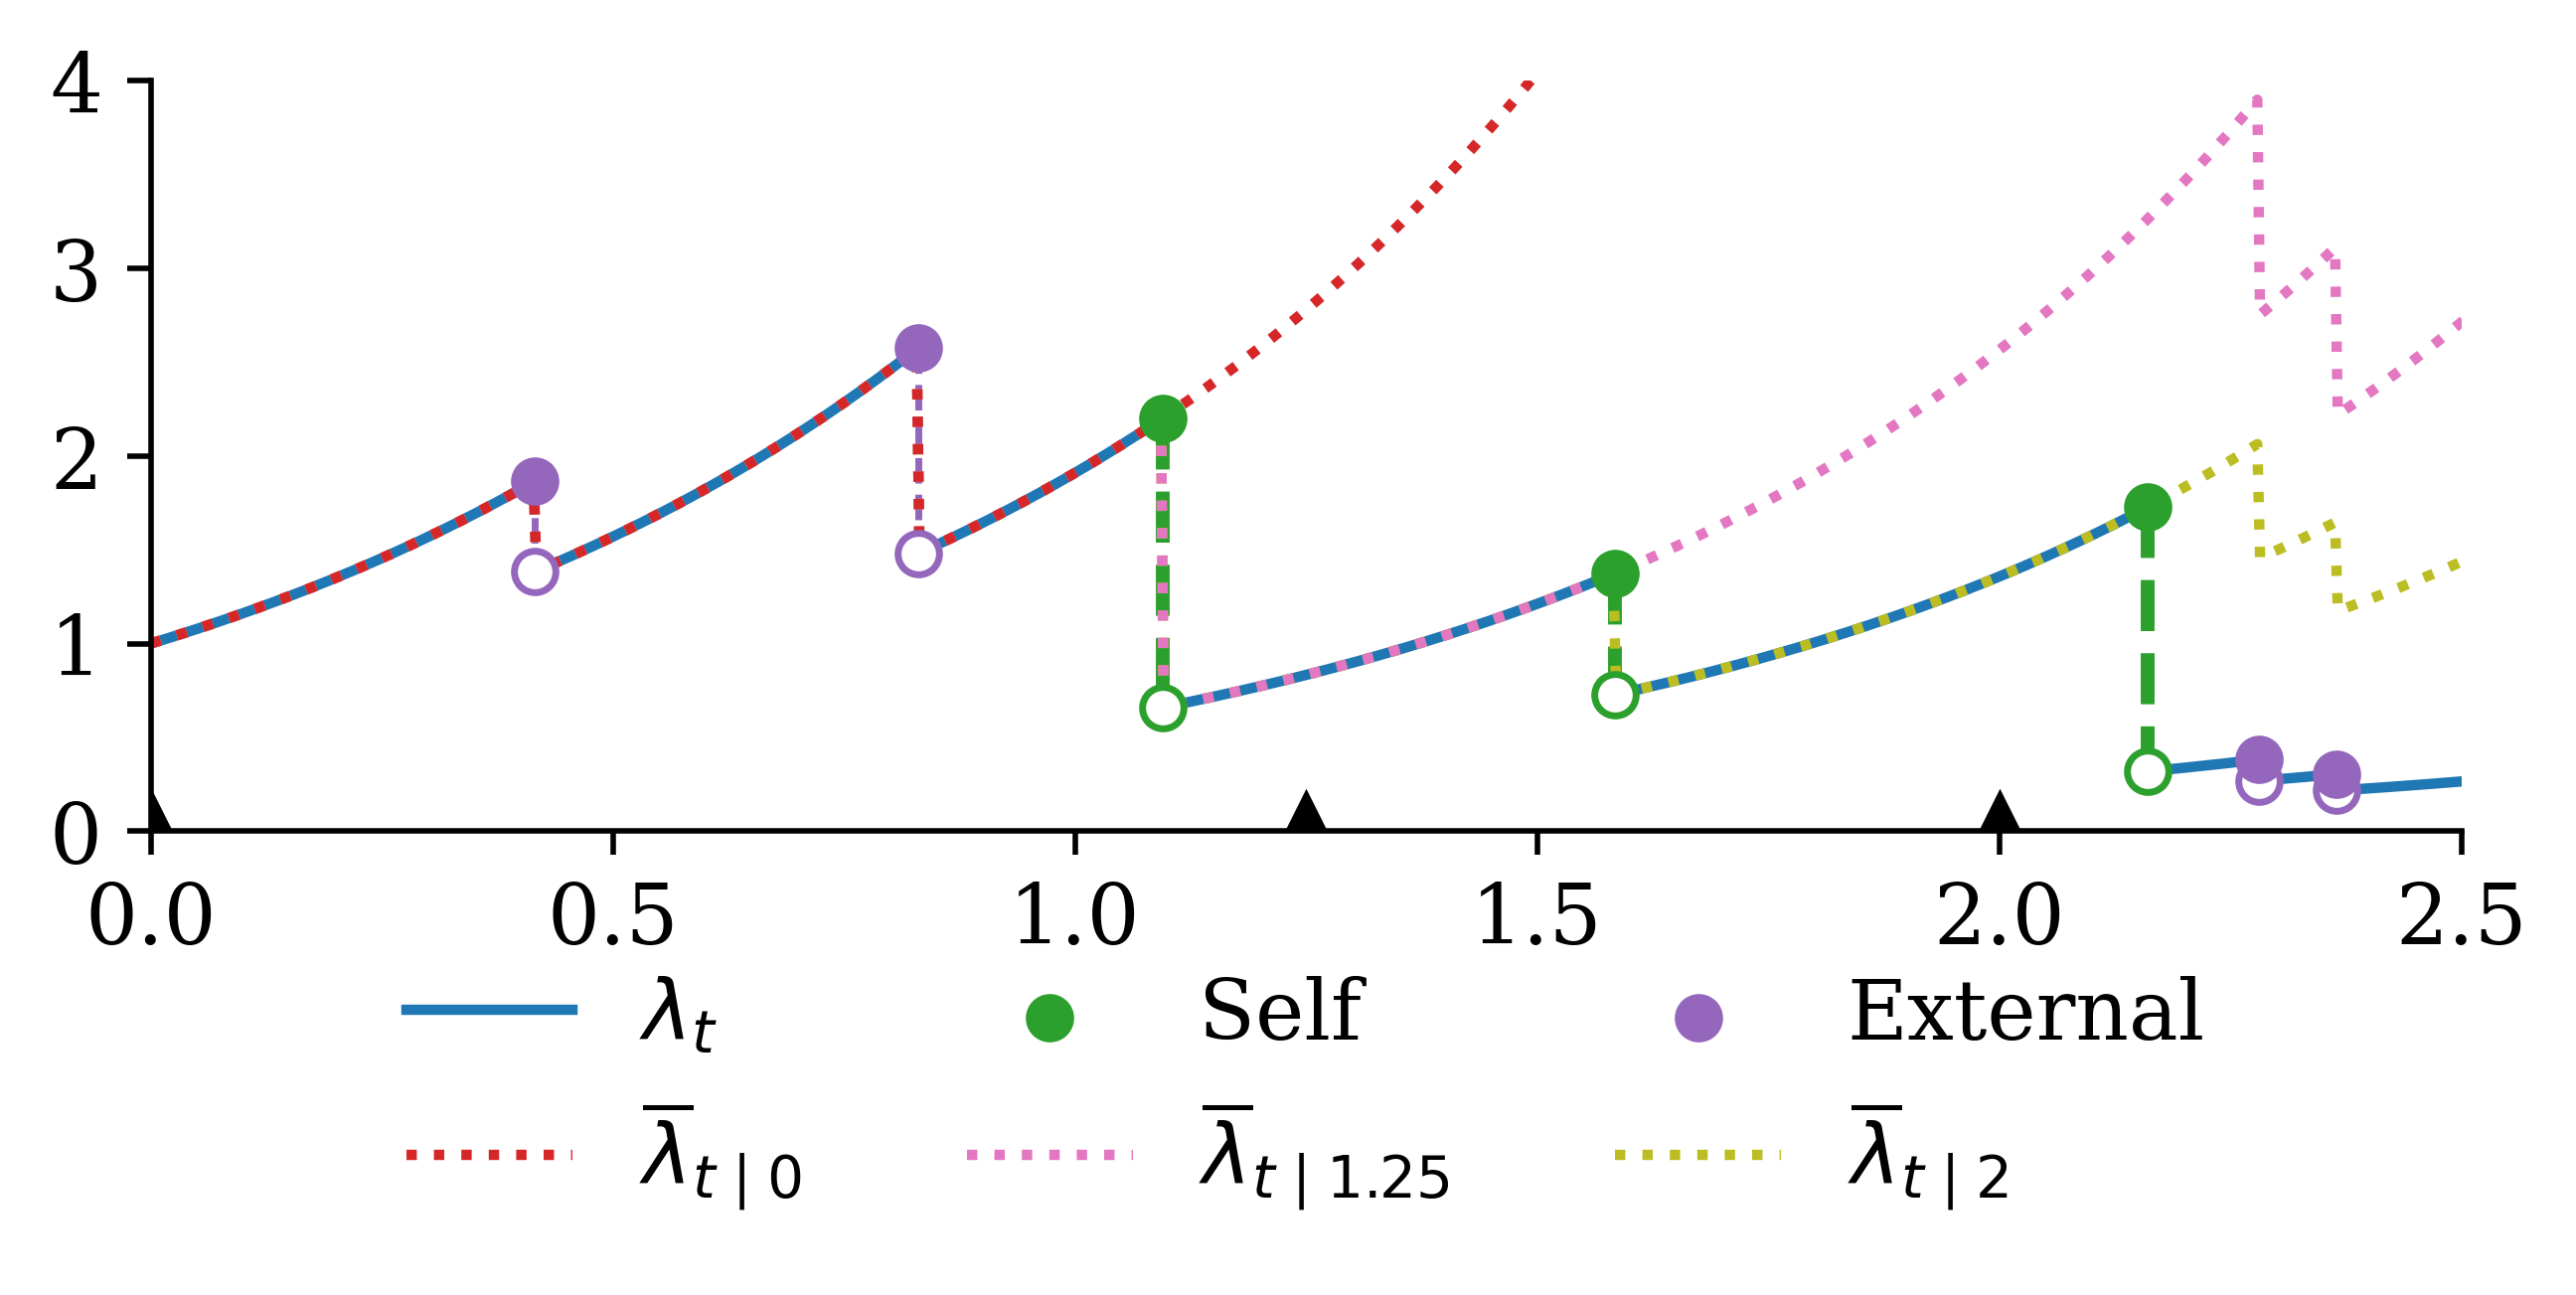

In [12]:
rnd.seed(2)

lambda0 = 1
beta = 1.5
lambdaS = 1
lambdaE = 2
rho = 2
mat = 3

fig, ax = plt.subplots(1, 1, figsize=(6, 2))  # , tight_layout=True)

ts, logLambdas, selfTs, extTs, Xs, Ys = simulate_exact_serially(
    lambda0, beta, lambdaS, lambdaE, rho, mat
)

tGrid = np.linspace(0, mat, 1000)

logInt = interp1d(ts, logLambdas, assume_sorted=True)
lambdas = np.exp(logInt(tGrid))
lambdas[:-1][np.diff(lambdas) < 0] = np.NaN

ax.plot(tGrid, lambdas, label="$\lambda_t$")

ax.scatter(selfTs, np.exp(logInt(selfTs - dt)), c=selfCol, zorder=4, label="Self")
ax.scatter(extTs, np.exp(logInt(extTs - dt)), c=extCol, zorder=4, label="External")

ax.scatter(
    selfTs,
    np.exp(logInt(selfTs + dt)),
    edgecolors=selfCol,
    facecolors="white",
    zorder=3,
)
ax.scatter(
    extTs, np.exp(logInt(extTs + dt)), edgecolors=extCol, facecolors="white", zorder=3
)


vertTimesSelf = np.sort(np.concatenate([selfTs, selfTs - dt, selfTs + dt]))
vertLambdasSelf = np.exp(logInt(vertTimesSelf))
vertLambdasSelf[2::3] = np.NaN
ax.plot(vertTimesSelf, vertLambdasSelf, lw=2, ls="--", c=selfCol)

vertTimesExt = np.sort(np.concatenate([extTs, extTs - dt, extTs + dt]))
vertLambdasExt = np.exp(logInt(vertTimesExt))
vertLambdasExt[2::3] = np.NaN
ax.plot(vertTimesExt, vertLambdasExt, lw=1, ls="--", c=extCol)

# plt.legend(frameon=False)
# xl = ax.get_xlim()

taus = (0, 1.25, 2)
cols = ("tab:red", "tab:pink", "tab:olive")

for tau, col in zip(reversed(taus), reversed(cols)):
    int_tau = intensities(
        lambda0, beta, selfTs[selfTs < tau], extTs, Xs[selfTs < tau], Ys, tGrid
    )
    plt.plot(
        tGrid,
        int_tau,
        c=col,
        ls=":",
        label="$\\overline{\\lambda}_{t \\mid " + str(tau) + "}$",
    )

plt.xlim([0, 2.5])
plt.ylim([0, 4])

lines, labels = ax.get_legend_handles_labels()
print(labels)
order = [0, 3, 4, 2, 5, 1]
plt.legend(
    [lines[i] for i in order],
    [labels[i] for i in order],
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.5, -0.35),
    loc="center",
    borderaxespad=0.0,
)

plt.plot(taus, [0 for _ in taus], "^", c="k", markersize=10)

sns.despine()

plt.savefig("intensity-bounds.pgf")